# **BIG MART SALES** 


**Contexto de Negocio**:
* BigMartSales es un dataset de ventas proveniente de una empresa del rubro retail, en el cual figuran la venta de los diferentes productos presentes en las 10 diferentes tiendas. 
* El objetivo del presente estudio es poder predecir las ventas de cada producto en un punto de venta en particular.

**Las características que se disponibilizan son las siguientes:**
- **Item_Identifier** --- (ID de producto unico.)
- **Item_Weight** --- (Peso del producto)
- **Item_Fat_Content** --- (EL producto es bajo en grasa o no?)
- **Item_Visibility** --- (El % del área de visualización total de todos los productos en una tienda asignada a un producto en particular)
- **Item_Type** --- (La categoria a la que pertenece el producto)
- **Item_MRP** --- (Precio minorista maximo -precio de lista- del producto)
- **Outlet_Identifier** --- (ID de tienda unica)
- **Outlet_Establishment_Year** --- (EL año en que se establecio la tienda)
- **Outlet_Size** --- (El tamaño de la tienda en terminos de superficie cubierta)
- **Outlet_Location_Type** --- (El tipo  de ciudad en la que se encuentra la tienda)
- **Outlet_Type** --- (Si la tienda es solo una tienda de comestibles o algun tipo de supermercado)

In [50]:
#Importando librerias necesarias para el Analisis Exploratorio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [51]:
#Extrayendo la data y  mostrando la cabecera
big_mart = "E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Big Mart Sales Prediction\Big-Mart-Sales-Prediction\BigMartSales.csv"
df = pd.read_csv(big_mart)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
#Mostrando las ultimas 3 filas del Dataframe
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [53]:
#Verificando la cantidad de filas y características presentes en el dataframe
df.shape
print(f"El Dataframe contiene: '{df.shape[0]}' filas")
print(f"El Dataframe contiene: '{df.shape[1]}' características")

El Dataframe contiene: '8523' filas
El Dataframe contiene: '12' características


In [54]:
#Verificando cantidad de filas duplicadas
df.duplicated().sum()

0

In [55]:
#Información general del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
#Cantidad de valores unicos por columna
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [57]:
#verificando nulos por características
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [58]:
# Porcentaje de valores nulos por columna
cant_valores_nulos = df.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (cant_valores_nulos/df.shape[0])*100
porcentaje_nulos.round(2)

Outlet_Size                  28.28
Item_Weight                  17.17
Item_Identifier               0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

- *Observamos que el porcentaje de valores nulos en la columna Outlet_Size es del 28.28% del total de la columna.*
- *El porcentaje de la columna de Item_Weight de valores nulos tambien es inferior ya que esta representado por el 17.17% del total.*
- *En base a estos valores inferiores se decide mantener las columnas para el Analisis Exploratorio de los datos, para esto se buscara realizar la limpieza e imputación adecuados.* 

In [59]:
#Valor promedio de la columna Item_Weight
df['Item_Weight'].value_counts().mean()

17.012048192771083

In [60]:
#Cantidad de valores presentes en la columna Outlet_Size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

## **Analisis de Valores nulos**
+ Para valores **Categoricos**, reemplazaremos los nulos por la moda
+ Para valores **Numericos**, reemplazaremos los nulos por el promedio

### **Analisis y reemplazo de valores nulos para la columna numerica Item_weight**

In [61]:
#Reemplazo de valores nulos en la columna numerica Item_Weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Item_Weight'].isnull().sum()

0

### **Analisis y reemplazo de valores nulos para la columna categorica Outlet_Size**

In [62]:
#Conteo de valores presentes en la columna Outlet_Size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [63]:
#Valor que mas se repite dentro de la columna Outlet_Size
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [64]:
#Reemplazo de valores nulos en la columna Outlet_Size por la moda = Medium
df['Outlet_Size'].fillna("Medium",inplace=True)
df['Outlet_Size'].isnull().sum()

0

### **Dataframe libre de valores nulos**

In [65]:
#Información general del nnuevo Dataframe libre de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*Como se observa, el Dataframe se encuentra libre de valores nulos y como siguientes pasos se realizara lo siguiente*:
+ Analisis de las variables categoricas
+ Analisis de las variables numericas

In [66]:
#Extracción de columnas categoricas
cols_cat = df.select_dtypes(include="object")
cols_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [67]:
#Conteo de valores unicos para cada columna
for col_cat in cols_cat:
    print(f"Los valores unicos para la columna '{col_cat}':")
    print(df[col_cat].unique())
    print("."*30)

Los valores unicos para la columna 'Item_Identifier':
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
..............................
Los valores unicos para la columna 'Item_Fat_Content':
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
..............................
Los valores unicos para la columna 'Item_Type':
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
..............................
Los valores unicos para la columna 'Outlet_Identifier':
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
..............................
Los valores unicos para la columna 'Outlet_Size':
['Medium' 'High' 'Small']
..............................
Los valores unicos para la columna 'Outlet_Location_Type':
['Tier 1' 'Tier 3' 'Tier 2']
..............................
Los valores unicos para la column

In [68]:
#reemplazo de valores en Item_Fat_content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [69]:
#valores unicos dentro del dataframe
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## *Analisis de variables numericas*

In [70]:
num_cols = df.select_dtypes(exclude=['object'])
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [71]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [72]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


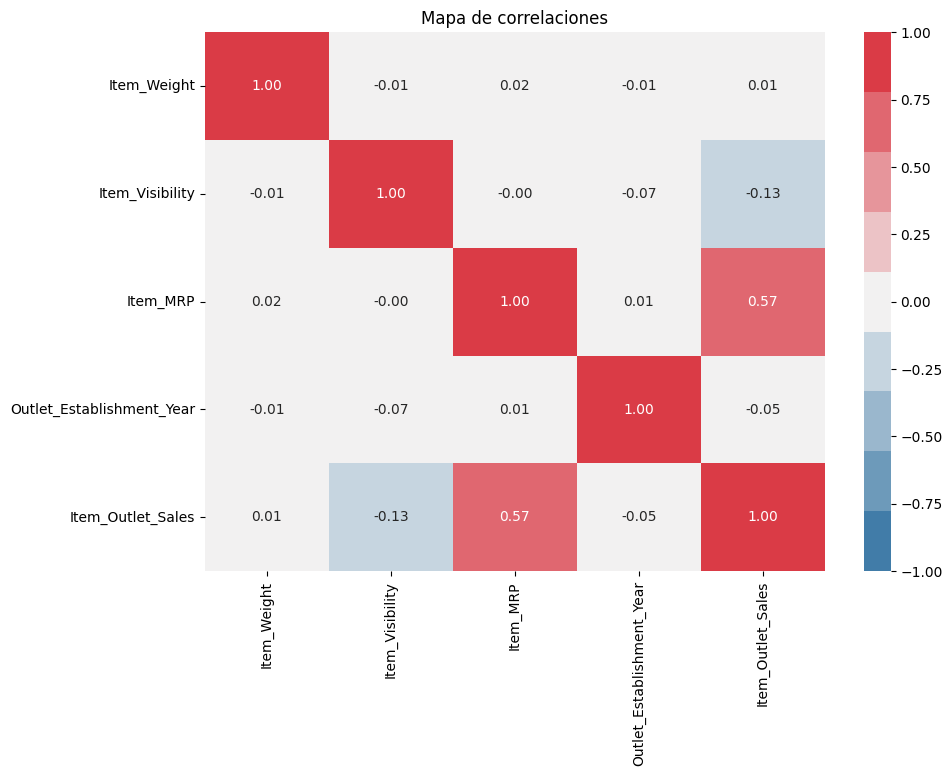

In [73]:
#mapa de correlaciones
plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(),annot=True,cmap=sns.diverging_palette(240,10,n=9),fmt=".2f",vmin=-1,vmax=1)
plt.title("Mapa de correlaciones")
plt.show()

*Observaciones:*
+ De las variables numericas en relacion al target, la unica que presenta una correlación positiva por encima de las demas es la de Item_MRP, el cual posee una correlación positiva de 0.57 indicando que esta variable representa un analisis mas detallado.



In [74]:
#Analisi estadistico de la Columna Item_MRP
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

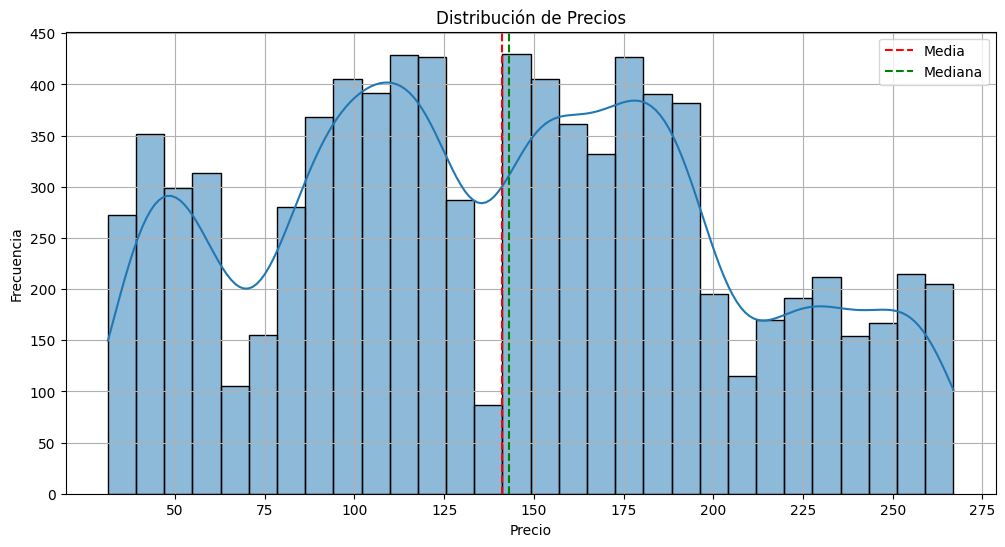

In [75]:
#Distribución de la columna Item_MRP
plt.figure(figsize=(12,6))
sns.histplot(df['Item_MRP'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.axvline(x=140.99, color='red', linestyle='--', label='Media')
plt.axvline(x=143.01, color='green', linestyle='--', label='Mediana')
plt.yticks(range(0,500,50))
plt.xticks(range(50,300,25))
plt.grid()
plt.legend()
plt.show()

*Interpretación*:
+ Aquellos productos que registran mayor cantidad de ventas son aquellos que estan entre los rangos de precio de 110 a 120, por otro lado tambien aquellos que estan entre los rangos de 140 a 180.

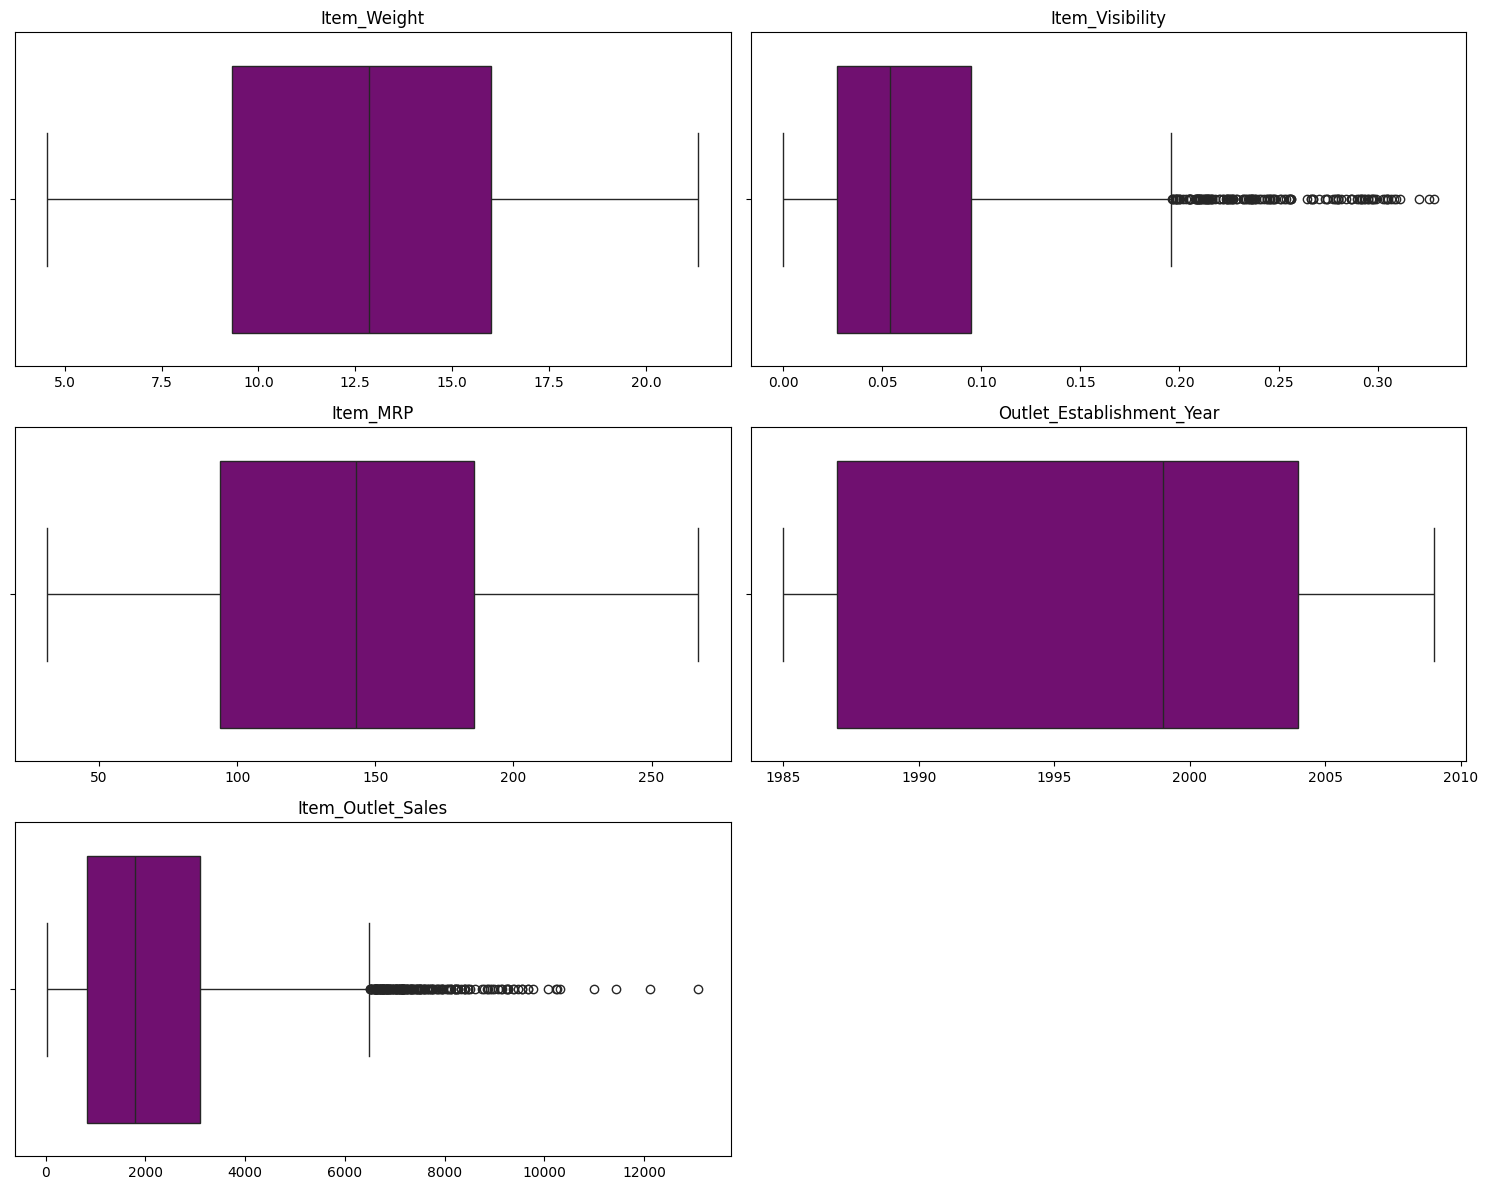

In [76]:
#Verificación de valores Outliers
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']
num_subplots = len(numeric_cols)
cols = 2 
rows = (num_subplots + cols - 1) // cols  

plt.figure(figsize=(15, 4 * rows))  
ind = 1
for col_num in numeric_cols:
    plt.subplot(rows, cols, ind)
    sns.boxplot(data=num_cols, x=col_num, color="purple")  
    plt.title(col_num)
    ind += 1
    plt.xlabel("")
plt.tight_layout()
plt.show()

*Observaciones:
+ Las caracteristicas o columnas de Item_Weight e Item_MRP son las unicas que presentan una distribución casi normal, sin poseer sesgo y la distrbucion de los datos tambien es de forma simetrica.
+ Las caracteristicas de Item_Visibility e Item_Outlet_Sales presenta un sesgo hacia la derechaq, asi mismo los datos no estan simetricamente distribuidos y se observa gran cantidad de valores atipicos en ambos.
+ Por ultimo,la característica de Outlet_Establishment_Year presenta sesgo hacia la izquierda indicando un sesgo negativo lo cual indica que laconcentración de los valores se encuentra establecimientos de años menores.

## **MACHINE LEARNING**

### **Preprocesamiento de los datos**

In [77]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:

X = df.drop(columns="Item_Outlet_Sales", axis=1)
y =df['Item_Outlet_Sales']

In [80]:
X.shape

(8523, 11)

In [81]:
y.shape

(8523,)

In [82]:
#librerias necesarias para el preprocesamiento
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import classification_report

In [83]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [84]:
one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

In [85]:
imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [86]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EEB9B4B140>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EEB9B4BAA0>)])

In [87]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EEB9B4B140>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EEB9B4BAA0>)])

In [89]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

ValueError: Shape of passed values is (8523, 1), indices imply (8523, 1601)